# Tarea Programada 1

## Descripción del Algoritmo

El algoritmo se compone de dos partes importantes: Movimiento de las partículas por paso y el Cálculo de Entropía por paso.

### Movimiento de las Partículas

Todas las partículas de crema cuentan con una probabilidad de 0.25 de desplazarse en determinada dirección; además, si tienen alguna partícula vecina o si se encuentran en un borde o una esquina, esa probabilidad de movimiento se mantiene, por lo que en las esquinas, la probabilidad de que la partícula no se mueva en un paso determinado es de 0.5. Una partícula sin vecinos o bloqueos se moverá libremente de forma aleatorio, mientras que una con un vecino o bloqueo tendrá posibilidades de permanecer quieta. En cada paso se realiza lo siguiente:

***
1. Se selecciona una casilla en la que haya una partícula de crema.
2. Se observa si esta se encuentra en un borde, esquina o está en el centro.
3. Se crea una lista con las direcciones posibles en las que la partícula se podrá mover, si está en un borde, no podrá moverse hacia el borde, si está en una esquina no podrá moverse en esas direcciones tampoco.
4. Luego se revisa si tiene vecinos, de no haberlos, a su lista de dirección se le agrega esa posibilidad de movimiento.
5. Se selecciona de forma aleatoria una dirección "UP", "DOWN", "RIGHT" y "LEFT", si es que existe en la lista, o un 0, y de ahí se realiza el movimiento o no, según sea el caso.
6. Se pasa a la siguiente partícula.
***

Una vez que se completan todas las partículas, se realiza el cálculo de la entropía para este paso.

### Cálculo de la entropía

El cálculo de la entropía como tal no conlleva mayores problemas, sino que es el de la probabilidad. Para calcular la probabilidad, se calcula la forma en la que se distribuye la probabilidad de encontrar partículas en el tiempo. En cada paso se realiza lo siguiente:

***
1. Se cuentan la cantidad de partículas que hay por estado.
2. Se suma la cantidad de partículas de cada estado a un acumulado en el tiempo, por lo que al final se obtiene la cantidad de partículas que estuvieron en ese estado durante todo el intervalo de tiempo.
3. Se divide el acumulado entre el número de partículas y el número de paso en el que se encuentra el sistema, esto permite obtener la distribución de probabilidad en el tiempo para cada paso.
4. Se calcula la entropía en ese paso, utilizando esa distribución, con la probabilidad obtenida para cada estado, utilizando la fórmula de Gibbs.
5. Se almacena la entropía calculada y el paso al que corresponde en listas respectivas.
6. Se pasa al siguiente paso.
***

Cuando el código se encuentra en los pasos 10, 100, 1000 y 10000, muestra el estado del sistema,

## Código

El código se adjunta a continuación comentado y con resultados, se puede accesar al repositorio en GitLab [Repositorio en GitLab!](https://gitlab.com/plasmallan/tarea-programada-1-f-sica-estad-stica) en donde se encuentran las imágenes que se mostrarán más a adelante, el código *script-TP1.py* que contiene el código que se muestra a continuación y el archivo de este cuaderno de Jupyter.

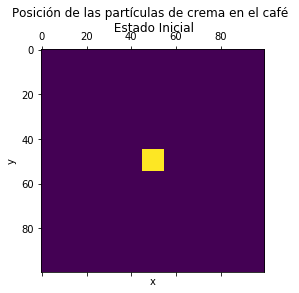

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: invalid value encountered in double_scalars


Gráficas de Estado Final, Entropía y Distribución de Probabilidad para 10 pasos


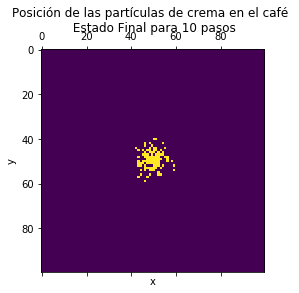

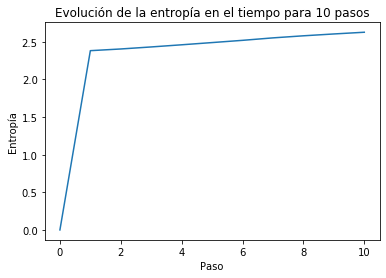

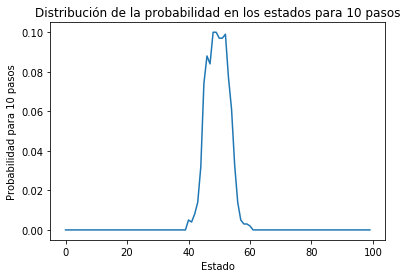

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: invalid value encountered in double_scalars


Gráficas de Estado Final, Entropía y Distribución de Probabilidad para 100 pasos


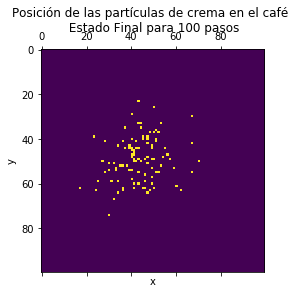

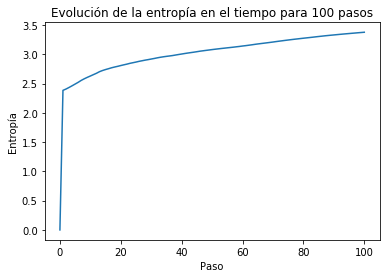

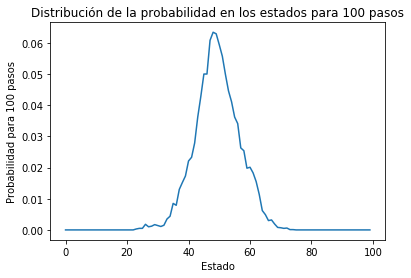

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: invalid value encountered in double_scalars


Gráficas de Estado Final, Entropía y Distribución de Probabilidad para 1000 pasos


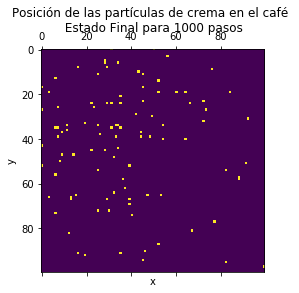

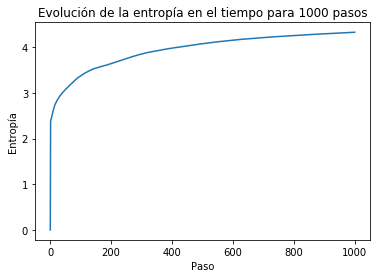

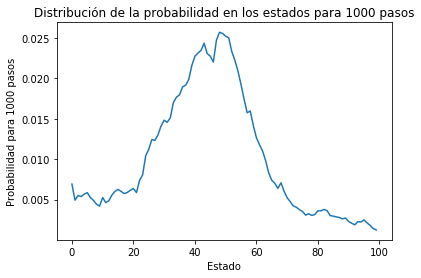

Gráficas de Estado Final, Entropía y Distribución de Probabilidad para 10000 pasos


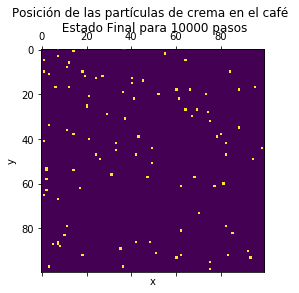

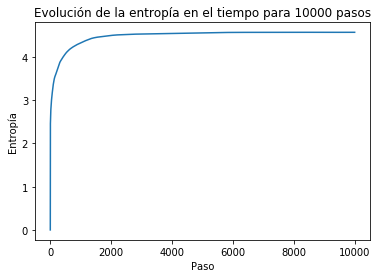

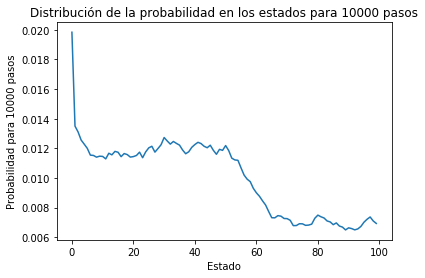

In [1]:
# Simulación de gota de crema en café.

# Imports

import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Cantidad de partículas
N = 100

#Arreglo de matriz

# Plano en donde yacen las partículas, el café
M = np.zeros((N,N))

# Se asigna valor de 1 a las posiciones en las que hay partícula.
# Se define el estado inicial de 100 partículas en un cuadrado de 10x10.

for i in range(0,N):
    if 45<= i <= 54:
        for j in range(0,N):
            if 45<= j <= 54:
                M[i][j] = 1
# Primer cálculo de entropía, debe ser 0.
splits = np.split(M,N) # Se subdivide el espacio M en N subarreglos

ent = 0 # Sumador de entropía

plt.matshow(M)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Posición de las partículas de crema en el café \n Estado Inicial")
plt.show()

# Se comienza a iterar sobre todas las partículas.
# Si en un campo hay un estado en 1, se chequean las posiciones alrededor
# Se escoge una posición desocupada de forma aleatoria.

p = 0 # Contaador de pasos
PP = [N/10,N,N*10,N*N]
P = N*N # Paso máximo

steps = []
entropy = []
prob = []
steps.append(p)
entropy.append(ent)

percell = np.zeros(N)

while p<=(P+1):
    
    for k in range(0,N):
        for l in range(0,N):
            if M.sum() != N:
                print(k)
                print(l)
                print(p)
                break
            
            direc = []
            
            if M[k][l] == 1: # Se selecciona celda ocupada

# Cada partícula en cada paso tiene una probabilidad de 0.25 de moverse en una dirección.
# Si está bloqueada en algún punto, esto se suma a una probabilidad de quedarse quieta.

                if k != N-1 and l != N-1 and k != 0 and l != 0: # Partículas en el bulk
                    if M[k - 1][l] != 1:
                        direc.append("UP")
                    else:
                        direc.append(0)
                    
                    if M[k][l+1] != 1:
                        direc.append("RIGHT")
                    else:
                        direc.append(0)
                        
                    if M[k+1][l] != 1:
                        direc.append("DOWN")
                    else:
                        direc.append(0)
                        
                    if M[k][l-1] != 1:
                        direc.append("LEFT")
                    else:
                        direc.append(0)

                elif k == N-1 and l != N-1: # Partículas en la parte más baja
                    direc.append(0)

                    if M[k-1][l] != 1:
                        direc.append("UP")
                    else:
                        direc.append(0)
                    
                    if M[k][l+1] != 1:
                        direc.append("RIGHT")
                    else:
                        direc.append(0)
                        
                    if M[k][l-1] != 1:
                        direc.append("LEFT")
                    else:
                        direc.append(0)

                elif l == N-1 and k != N-1: # Partículas en lado derecho
                    direc.append(0)

                    if M[k-1][l] != 1:
                        direc.append("UP")
                    else:
                        direc.append(0)
                    
                    if M[k+1][l] != 1:
                        direc.append("DOWN")
                    else:
                        direc.append(0)
                        
                    if M[k][l-1] != 1:
                        direc.append("LEFT")
                    else:
                        direc.append(0)

                elif l == N-1 and k == N-1: # Partículas en la esquina inferior derecha
                    direc.append(0)

                    direc.append(0)

                    if M[k-1][l] != 1:
                        direc.append("UP")
                    else:
                        direc.append(0)
                    
                    if M[k][l-1] != 1:
                        direc.append("LEFT")
                    else:
                        direc.append(0)

                elif k == 0 and l != 0: # Partículas en el lado superior
                    direc.append(0)
                    
                    if M[k][l+1] != 1:
                        direc.append("RIGHT")
                    else:
                        direc.append(0)
                        
                    if M[k+1][l] != 1:
                        direc.append("DOWN")
                    else:
                        direc.append(0)
                        
                    if M[k][l-1] != 1:
                        direc.append("LEFT")
                    else:
                        direc.append(0)

                elif k != 0 and l == 0: # Partículas en el lado izquierdo
                    direc.append(0)
                    
                    if M[k-1][l] != 1:
                        direc.append("UP")
                    else:
                        direc.append(0)
                    
                    if M[k][l+1] != 1:
                        direc.append("RIGHT")
                    else:
                        direc.append(0)
                        
                    if M[k+1][l] != 1:
                        direc.append("DOWN")
                    else:
                        direc.append(0)

                elif k == 0 and l == 0: # Partículas en la esquina superior izquierda
                    direc.append(0)

                    direc.append(0)
                    
                    if M[k][l+1] != 1:
                        direc.append("RIGHT")
                    else:
                        direc.append(0)
                        
                    if M[k+1][l] != 1:
                        direc.append("DOWN")
                    else:
                        direc.append(0)

                elif k == 0 and l == N-1: # Partículas en la esquina superior derecha
                    direc.append(0)

                    direc.append(0)
                        
                    if M[k+1][l] != 1:
                        direc.append("DOWN")
                    else:
                        direc.append(0)
                        
                    if M[k][l-1] != 1:
                        direc.append("LEFT")
                    else:
                        direc.append(0)

                elif k == N-1 and l == 0: # Partículas en la esquina inferior izquierda
                    direc.append(0)

                    direc.append(0)
                    
                    if M[k-1][l] != 1:
                        direc.append("UP")
                    else:
                        direc.append(0)
                    
                    if M[k][l+1] != 1:
                        direc.append("RIGHT")
                    else:
                        direc.append(0)
                        
# Se toma un camino de forma aleatoria de los restantes posibles.
                step = rd.choice(direc)
                    
                if step == "UP":
                    M[k][l] = 0
                    M[k-1][l] = 1

                elif step == "RIGHT":
                    M[k][l] = 0
                    M[k][l+1] = 1

                elif step == "DOWN":
                    M[k][l] = 0
                    M[k+1][l] = 1

                elif step == "LEFT":
                    M[k][l] = 0
                    M[k][l-1] = 1

                else:
                    pass
            
    if M.sum() != N:
        print(k)
        print(l)
        print(p)
        break

    ent = 0 # Sumador de entropía
    p = p + 1

# Parte 2: Se toma cada estado en cada paso y se suma la cantidad de partículas
# Por paso se acumulan la cantidad de partículas en ese estado
    for n in range(N):
        percell[n] = percell[n] + np.sum(M[n])

# Se define la probabilidad por paso como el acumulado de partículas por estado
# Entre el paso por el número de partículas, de tal forma que se crea un acumulado
# de probabilidad que por paso siempre sumará 1.
    ps = percell/(p*N)
    prob.append(ps)
    
# Se calcula la entropía siguiendo la fórmula de Gibbs, se accesa la probabilidad.
# Almacenada acumulada por estado para calcularla.
    for pp in range(N):
        ent = ent - np.nansum(ps[pp]*np.log(ps[pp]))

# Se almacena el paso y la entropía del sistema en este paso.
    steps.append(p)
    entropy.append(ent)

    if p in PP:
        
        print("=======================================================================")
        print("Gráficas de Estado Final, Entropía y Distribución de Probabilidad para " + str(int(p)) + " pasos")
# Se grafica el estado final.  
        plt.matshow(M)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Posición de las partículas de crema en el café \n Estado Final para " + str(int(p)) + " pasos")
        plt.show()

# Se grafica la entropía como función de los pasos.
        plt.plot(steps,entropy)
        plt.xlabel("Paso")
        plt.ylabel("Entropía")
        plt.title("Evolución de la entropía en el tiempo para " + str(int(p)) + " pasos")
        plt.show()

# Se grafica la distribución de la probabilidad por estado para el estado final.
        plt.plot(range(N),ps)
        plt.xlabel("Estado")
        plt.ylabel("Probabilidad para " + str(int(p)) + " pasos")
        plt.title("Distribución de la probabilidad en los estados para " + str(int(p)) + " pasos")
        plt.show()
        print("=======================================================================")

## Gráficas

Se muestran en las figuras 1, 2, 5, 8 y 11, la forma en la que se encuentran posicionadas las partículas para los pasos 0, 10, 100, 1000 y 10000. En las figuras 3, 6, 9 y 12, se muestra la evolución temporal de la distribución de la probabilidad para los pasos 10, 100, 1000 y 10000. Cabe destacar la tendencia al amontonamiento en los estados que están a la izquierda y hacia arriba, esto esto se debe a la forma en la que trabaja el algoritmo para mover las partículas, puesto que el movimiento partícula por partícula ocasiona que aparezca un grado de libertad más, hacia la izquierda y hacia arriba en las partículas, que influye en que haya una preferencia en estos estados, esto se nota más en las figutas 9 y 12, donde se ve el desplazamiento de la probabilidad máxima hacia la izquierda, en los estados más "bajos".

Por último, se observa en las figuras 4, 7, 10 y 13, la forma en la que se comportó la entropía hasta los pasos 10, 100, 1000 y 10000. Se observa en la figura 4, que el aumento de la entropía del paso 0 al 1 es muy alto, 2.3, de alrededor de la mitad de la entropía máxima que alcanza el sistema, más o menos 4.6, mientras que del paso 1 al 1000, aproximadamente, logra duplicar este valor.

![Estado Inicial](Graphs/Step0.PNG)
<div align="center">Figura 1. Posiciones de las partículas en el paso 0.</div>

![Estado 10 Pasos](Graphs/Step10.PNG)
<div align="center">Figura 2. Posiciones de las partículas en el paso 10.</div>

![Probabilidad 10 Pasos](Graphs/Prob10.PNG)
<div align="center">Figura 3. Gráfica de Distribución de probabilidad de los 10 primeros pasos.</div>

![Entropía 10](Graphs/Entropy10.PNG)
<div align="center">Figura 4. Gráfica de la Entropía en función del tiempo para 10 pasos.</div>

![Estado 100 Pasos](Graphs/Step100.PNG)
<div align="center">Figura 5. Posiciones de las partículas en el paso 100.</div>

![Probabilidad 100 Pasos](Graphs/Prob100.PNG)
<div align="center">Figura 6. Gráfica de Distribución de probabilidad de los 100 primeros pasos.</div>

![Entropía 100](Graphs/Entropy100.PNG)
<div align="center">Figura 7. Gráfica de la Entropía en función del tiempo para 100 pasos.</div>

![Estado 1000 Pasos](Graphs/Step1000.PNG)
<div align="center">Figura 8. Posiciones de las partículas en el paso 1000.</div>

![Probabilidad 1000 Pasos](Graphs/Prob1000.PNG)
<div align="center">Figura 9. Gráfica de Distribución de probabilidad de los 1000 primeros pasos.</div>

![Entropía 1000](Graphs/Entropy1000.PNG)
<div align="center">Figura 10. Gráfica de la Entropía en función del tiempo para 1000 pasos.</div>

![Estado 10000 Pasos](Graphs/Step10000.PNG)
<div align="center">Figura 11. Posiciones de las partículas en el paso 10000.</div>

![Probabilidad 10000 Pasos](Graphs/Prob10000.PNG)
<div align="center">Figura 12. Gráfica de Distribución de probabilidad de los 10000 primeros pasos.</div>

![Entropía 10000](Graphs/Entropy10000.PNG)
<div align="center">Figura 13. Gráfica de la Entropía en función del tiempo para 10000 pasos.</div>

## Discusión de resultados

La mecánica estadística es uno de los pilares de la física moderna. Esta describe cómo observaciones macroscópicas como la temperatura y presión se relacionan con parámetros estadísticos. 
La física estadística es necesaria para el estudio de sistemas físicos donde se cuenta con un gran número de grados de libertad. Esta se basa en el uso de métodos probabilísticos, estadísticos y en la aplicación de las leyes físicas a sistemas microscópicos.

Una gran parte de la utilidad de la física estadística surge en el análisis de sistemas compuestos por múltiples partículas. Un ejemplo de esto es la simulación de una gota de crema que se esparce en una taza de café.
Inicialmente el investigador se podría ver tentado en aplicar las ecuaciones de Newton (un método determinista) a cada una de las partículas para así  calcular sus trayectorias, sin embargo existen otros métodos que también permiten extraer información útil del sistema. 

Por ejemplo si se considera que las partículas de crema en general tiene una trayectoria aleatoria dentro de la taza de café, se puede utilizar las herramientas de la mecánica estadística, para analizar el sistema. Aunque no se conozca con certeza la evolución de las posiciones de las partículas con el tiempo, se puede extraer el comportamiento macroscópico del sistema a partir del estudio de las propiedades microscópicas y probabilísticas del sistema. Un ejemplo de esta conexión se encuentra en la entropía la cual es una propiedad macroscópica que se define a partir de lo estados microscópicos del sistema. 

El análisis de cantidades como la entropía, y por ende de los microestados, permiten entender los sistemas físicos sin la necesidad de recurrir a un análisis exhaustivo utilizando las ecuaciones de Newton. Regresando al ejemplo de la gota de crema en el café, podemos ver en la figura 4, como hay un aumento súbito en la entropía del sistema café-crema para el primer paso. Esto nos dice que hay un aumento significativo en la probabilidad de encontrar partículas en otros estados, diferentes al inicial, como resultado de que las partículas que conforman la gota se comienza a propagar por el café [2].

Si observamos la figura 13, podemos apreciar como con el pasar del tiempo la entropía del sistema aumenta y tiende a un valor máximo. Esto nos muestra en acción que:

    Un cambio en entropía es la razón de la energía transferida como calor, desde o hacia un sistema, con la temperatura a la que es transferida. (...) Se analiza entonces la afirmación de Kelvin y Clausius: la entropía del universo aumenta en el transcurso de cualquier cambio espontáneo. La palabra clave es universo: significa, como siempre en termodinámica, el sistema con sus alrededores. [1]

Sin embargo, la entropía no aumenta infinitamente, por el contrario tiende a un valor específico, que se alcanza una vez que el sistema llega al equilibrio termodinámica, dado a que se está trabajando con un sistema cerrado. Temperatura, presión y potencial químico entre la “crema” y el “café” se igualan, y como no hay ningún ingreso de energía, o trabajo, en el sistema que lo altere no hay contribuciones al aumento de la entropía.

Por último regresando a la utilidad del modelo aleatorio y la mecánica estadísticas nos podemos percatar que en el sistema crema-café simulado, no existe ninguna ley de la física dentro del pseudocódigo que establezca que se debe mantener cierta energía, o que una vez alcanzada la entropía máxima, en el equilibrio, el sistema se mantiene de esa forma, etc.

Hay probabilidad que dentro de los caminos aleatorios tomados por las partículas más adelante en el tiempo se regrese a ese estado o se llegue a otros de menores entropías, mientras que para un sistema termodinámico más real, en donde se debe buscar maximizar la entropía y disminuir la energía, en donde hay intercambios de energía hasta que las temperaturas se igualan, la probabilidad sería de casi 0.


## Problemas encontrados

***

* Hay una tendencia a que las partículas se acumulen en la esquina superior izquierda, ocurre porque una vez seleccionadas las primeras partículas que se encuentran en esa sección del estado inicial se liberan espacios para las partículas a la derecha y abajo de estas. Esto podría solucionarse de una forma complicada, manteniendo las partículas en su posición anterior hasta que se hayan desplazado la totalidad de partículas que podían desplazarse.

* La definición de la probabilidad que evoluciona en el tiempo. Este problema se presentó a raíz de que se buscaba que la probabilidad calculada incluyera a las partículas que estuvieron en estados anteriores, de tal forma que se lograra encontrar una distribución de probabilidad en la cantidad de pasos dada. Esto se solucionó creando la lista o arreglo de 100 espacios que almacenara la cantidad acumulada de partículas que había en cada estado y normalizando con el número de partículas y el número de pasos.

***

## Conclusiones

***

* Se observó la evolución de la entropía en el tiempo y cómo tiende a un valor máximo una vez alcanza el equilibrio.
* Se obtuvo la distribución de probabilidad de encontrar una partícula en cualquiera de los 100 estados durante los 10000 pasos. 
* Se comprendió por qué existe un aumento súbito de la entropía del paso 0 al 1, dado el aumento de estados ocupados y con esto de la probabilidad de encontrar partículas en estos.
* Se observó la forma en la que la entropía de Gibbs se adapta al análisis de sistemas dinámicos, a diferencia de la Boltzmann que se utiliza para sistemas en equilibrio termodinámico global [2].

***

# Referencias

[1] P. Atkins. The Laws of Thermodynamics: A Very Short Introduction. Oxford University Press Inc., New York. 2010.

[2] ACuriousMind. Physics StackExchange. https://physics.stackexchange.com/questions/141321/what-is-the-conceptual-difference-between-gibbs-and-boltzmann-entropies. 2014.